In [2]:
# import libraries that we are going to use to construct Linear regression 
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv('mllab-03-auto-mpg.csv')

In [4]:
data.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [5]:
len(data)

392

In [9]:
y = data['mpg']

In [10]:
x = data.drop(['mpg', 'name'], axis=1)

In [18]:
y_train = y[0:int(len(y)*0.8)]
y_test = y[int(len(y)*0.8):len(y)]

In [19]:
x_train = x[0:int(len(x)*0.8)]
x_test = x[int(len(x)*0.8):len(x)]

# Normal equation formula approach

In [27]:
class LinearRegression_NEF:
    def fit(self, train, target):
        # to initial matrix of features i am adding one column of 1s that related to w0 or so called bias
        # to get correct number of 1s use the shape of training dataset
        # particularly the number of rows -> train.shape[0]
        # to add a column apply np.ones from numpy. BUT! 
        # use two brakets to get a column of 1s
        
        train_expanded = np.concatenate((np.ones((train.shape[0],1)),train.to_numpy()),axis=1)
        
        # this is "Normal equation formula" 
        # applying this will give us the best weights (vector of w) for predictions 
        
        self.w_best = np.linalg.inv(train_expanded.T.dot(train_expanded)).dot(train_expanded.T).dot(target)
        
        print('w best is: ', self.w_best)
        
    def predict(self, features):
        # here we are doing prediction 
        # first we need to transform input matrix
        # we have to add w0 column consisting of 1s like in a model training steps
        
        features_expanded = np.concatenate((np.ones((features.shape[0],1)),features.to_numpy()),axis=1)
        
        # to predict we simply multiply  modified (expanded by w0 = 1) input matrix by best weights w_best
        y_hat = features_expanded.dot(self.w_best)
        
        return y_hat

In [28]:
model = LinearRegression_NEF()

In [29]:
model.fit(x_train, y_train)

w best is:  [-1.58281033 -0.51948961  0.01021389 -0.01776699 -0.00557234 -0.11267481
  0.58200751  0.84802524]


In [30]:
y_hat = model.predict(x_test)

In [31]:
print(r2_score(y_test, y_hat))

0.24143714944968242


In [34]:
residuals = (y_test - y_hat) 
rss

2169.5558147563365

# Additional info

# 1. functions

In [30]:
# to get a column
np.ones((5,1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [32]:
# to get a row
np.ones(5)

array([1., 1., 1., 1., 1.])

In [41]:
# matrix multiplication -> .dot() or @ 
A = np.array([
    [1, 1, 1], 
    [-2, -2, -2]])

B = np.array([
    [1, 0], 
    [0, 1],
    [1, 1]])

print(A.dot(B))
print('--------') 
print(A @ B) 

[[ 2  2]
 [-4 -4]]
--------
[[ 2  2]
 [-4 -4]]


In [46]:
# to get inverted matrix !!! only for square matrix and non singular 
A = np.array([
    [1,  2, 1], 
    [-2,-2,-2],
    [-4,-3,-3]])
B = np.linalg.inv(A)

print(A)
print('--------') 
print(B)

[[ 1  2  1]
 [-2 -2 -2]
 [-4 -3 -3]]
--------
[[-0.   1.5 -1. ]
 [ 1.   0.5  0. ]
 [-1.  -2.5  1. ]]


In [47]:
# to transponse matrix use .T
A = np.array([
    [1,  2, 1], 
    [-2,-2,-2],
    [-4,-3,-3]])
B = A.T
print(A)
print('--------') 
print(B)

[[ 1  2  1]
 [-2 -2 -2]
 [-4 -3 -3]]
--------
[[ 1 -2 -4]
 [ 2 -2 -3]
 [ 1 -2 -3]]


# 2. theory

Normal equation formula
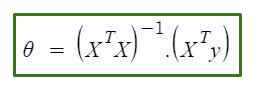